# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.io import mmread
import time
import sys
from metodos_interativos import (SOR, GradienteConjugadoNormal)
from T2 import (SOR_SparseMatrix, GradienteConjugadoNormalCOO, ProdutoVetorMatrizCOO, GeraVetor_b, OrdenaCOO)

## Importando a matriz baixada

In [68]:
# Esolhendo a matriz a ser analisada
matriz_name = "Trefethen_2000"

# Le o arquivo e ordena a representação COO da matriz esparsa por linha
sparse_matrix_coo = mmread("./" + matriz_name + "/" + matriz_name +".mtx")
# Gera a forma completa da matriz esparsa
matriz = sparse_matrix_coo.toarray()
# Gera o vetor b com a matriz esparsa
b = GeraVetor_b(matriz)
# Gera um array de todas as posições "j" com elementos não nulos
rows, cols = OrdenaCOO(matriz)

In [85]:
# len(rows)

## Definindo uma matriz dos slides para teste

In [16]:
matriz_teste = np.array([(0.2,0.1,1,1,0),(0.1,4,-1,1,-1),(1,-1,60,0,-2),(1,1,0,8,4),(0,-1,-2,4,700)])
b_teste = np.array([1,2,3,4,5])
rows_teste, cols_teste = OrdenaCOO(matriz_teste)

# Trabalhando com a matriz esparsa sem formato COO

## Metodo SOR

Aplica o metodo SOR do arquivo "metodos_iterativos.py", que não considera a configuração COO da matriz esparsa

In [86]:
tol_SOR = 10 ** (-3)
max_int = 300
w = 0.5
num_interacoes_SOR = []
ajustes_SOR = []
tempos_SOR = []
erros_SOR = []
while w <= 2.1:
    tempo_matriz_completa1 = time.time()
    sol_SOR, num_int_SOR = SOR(matriz, b, tol_SOR, max_int, w)
    tempo_matriz_completa2 = time.time()
    erro_SOR = (sol_SOR - np.ones(len(sol_SOR)))**(2)
    ajustes_SOR.append(w)
    num_interacoes_SOR.append(num_int_SOR)
    tempos_SOR.append(tempo_matriz_completa2 - tempo_matriz_completa1)
    erros_SOR.append(sum(erro_SOR))
    print("coeficiente de ajuste: ",w)
    w += 0.1
    

# Gera o dataFrame
df_analise_SOR = pd.DataFrame({"coef_ajuste": ajustes_SOR, 
                               "num_interacoes": num_interacoes_SOR, 
                               "tempos": tempos_SOR, 
                               "erros": erros_SOR, 
                               "tolerancia": tol_SOR})

## Metodo do conjugado gradiente

Aplica o metodo do Gradiente Conjugado do arquivo "metodos_interativos.py", que não considera a configuração COO da matriz esparsa

In [87]:
num_interacoes_gradConjugado = []
erros_gradienteConjugado = []
tempos_gradConjugado = []
tolerancias_gradConjugado = []
i = -1
while i >= -10:
    tolerancia = 10 ** (i)
    tempo_gradConjugado1 = time.time()
    x, k = GradienteConjugadoNormal(matriz, b, len(matriz), tolerancia)
    tempo_gradConjugado2 = time.time()
    erro_SOR_COO = (x - np.ones(len(x)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado.append(k)
    erros_gradienteConjugado.append(sum(erro_SOR_COO))
    tempos_gradConjugado.append(tempo_gradConjugado2 - tempo_gradConjugado1)
    tolerancias_gradConjugado.append(i)
    i -= 1

# Gera o dataFrame
df_analise_gradienteConjugado = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado, 
                                              "tempos": tempos_gradConjugado, 
                                              "erros": erros_gradienteConjugado, 
                                              "tolerancia": tolerancias_gradConjugado})

# Trabalhando com a matriz esparsa no formato COO

## Metodo SOR

Aplica o metodo do SOR do arquivo "T2.py", que considera a configuração COO da matriz esparsa

In [88]:
tol_SOR_COO = -1
df_analise_SOR_COO = pd.DataFrame({"coef_ajuste": [], 
                                   "num_interacoes": [], 
                                   "tempos": [], 
                                   "erros": [],
                                   "tolerancia": []})
while tol_SOR_COO >= -10:
    print("tolerancia: ", tol_SOR_COO)
    max_int = 300
    w = 0.5
    num_interacoes_SOR_COO = []
    ajustes_SOR_COO = []
    tempos_SOR_COO = []
    erros_SOR_COO = []
    while w < 2.1:
        tempo_matriz_COO_1 = time.time()
        sol_SOR_COO, num_int_SOR_COO = SOR_SparseMatrix(matriz, b, rows, cols, w, 10**(tol_SOR_COO), max_int)
        tempo_matriz_COO_2 = time.time()
        erro_SOR_COO = (sol_SOR_COO - np.ones(len(sol_SOR_COO)))**(2)
        ajustes_SOR_COO.append(w)
        num_interacoes_SOR_COO.append(num_int_SOR_COO)
        tempos_SOR_COO.append(tempo_matriz_COO_2 - tempo_matriz_COO_1)
        erros_SOR_COO.append(sum(erro_SOR_COO))
        w += 0.1
    
    # Gera um dataFrame auxiliar com os dados para o nivel de tolerância "tol_SOR_COO"
    df_aux = pd.DataFrame({"coef_ajuste": ajustes_SOR_COO, 
                           "num_interacoes": num_interacoes_SOR_COO, 
                           "tempos": tempos_SOR_COO, 
                           "erros": erros_SOR_COO, 
                           "tolerancia": tol_SOR_COO})
    df_analise_SOR_COO = pd.concat([df_analise_SOR_COO, df_aux])
    tol_SOR_COO -= 1
    
# Gera o dataFrame  
df_analise_SOR_COO = df_analise_SOR_COO.reset_index()

In [89]:
# df_analise_SOR

In [90]:
# df_analise_SOR_COO[df_analise_SOR_COO.tolerancia == -3]

## Metodo do Gradiente Conjugado

### Matriz baixada

Aplica o metodo do Gradiente Conjugado do arquivo "metodos_interativos.py", que considera a configuração COO da matriz esparsa

In [91]:
num_interacoes_gradConjugado_COO = []
erros_gradienteConjugado_COO = []
tempos_gradConjugado_COO = []
tolerancias_gradConjugado_COO = []
i = -1
while i >= -10:
    tolerancia_COO = 10 ** (i)
    tempo_gradConjugado_COO1 = time.time()
    x_COO, k_COO = GradienteConjugadoNormalCOO(matriz, rows, cols, b, len(matriz), tolerancia_COO)
    tempo_gradConjugado_COO2 = time.time()
    erro_GradConjugado_COO = (x_COO - np.ones(len(x_COO)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado_COO.append(k_COO)
    erros_gradienteConjugado_COO.append(sum(erro_GradConjugado_COO))
    tempos_gradConjugado_COO.append(tempo_gradConjugado_COO2 - tempo_gradConjugado_COO1)
    tolerancias_gradConjugado_COO.append(i)
    i -= 1

# Gera o dataFrame
df_analise_gradienteConjugado_COO = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado_COO, 
                                                  "tempos": tempos_gradConjugado_COO, 
                                                  "erros": erros_gradienteConjugado_COO, 
                                                  "tolerancia": tolerancias_gradConjugado_COO})

In [92]:
# df_analise_gradienteConjugado

In [93]:
# df_analise_gradienteConjugado_COO

### Matriz teste

Testa o metodo do Gradiente Conjugado na matriz do slide, considerando a configuração COO da matriz esparsa

In [272]:
tolerancia = 10 ** (-10)
x_teste, k_teste = GradienteConjugadoNormal(matriz_teste, rows_teste, cols_teste, b_teste, len(matriz_teste), tolerancia)
print(k_teste)
print(x_teste)
print(max(x_teste - np.ones(len(x_teste))))
if max(x_teste - np.ones(len(x_teste))) <= tolerancia: print(True)

Como o tempo necessário para rodar esses algoritmos é bem grande, escolhi salvar cada data frame gerado acima em um csv e apenas importa-los novamente para análise abaixo.

In [166]:
# Esolhendo a matriz a ser analisada
matriz_name = "Trefethen_2000"

df_analise_SOR = pd.read_csv("./analise_" + matriz_name + "/SOR.csv")
df_analise_gradienteConjugado = pd.read_csv("./analise_" + matriz_name + "/gradienteConjugado.csv")
df_analise_SOR_COO = pd.read_csv("./analise_" + matriz_name + "/SOR_COO.csv")
df_analise_gradienteConjugado_COO = pd.read_csv("./analise_" + matriz_name + "/gradienteConjugado_COO.csv")

Comparação do SOR com configuração COO da matriz e configuração normal

In [193]:
df_analise_SOR

,Unnamed: 0,coef_ajuste,num_interacoes,tempos,erros,tolerancia
0,0,0.5,20,33.777603,1.010217e-05,0.001
1,1,0.6,16,28.095735,6.202197e-06,0.001
2,2,0.7,14,24.257538,1.365521e-06,0.001
3,3,0.8,11,19.137502,1.124578e-06,0.001
4,4,0.9,9,16.213497,3.566155e-07,0.001
5,5,1.0,7,12.545855,5.443794e-08,0.001
6,6,1.1,8,14.076840,1.764407e-09,0.001
7,7,1.2,10,17.677786,1.080810e-08,0.001
8,8,1.3,12,20.979797,5.368929e-08,0.001
9,9,1.4,15,25.808788,9.909283e-08,0.001


In [194]:
df_analise_SOR_COO[df_analise_SOR_COO.tolerancia == -3]

,Unnamed: 0,index,coef_ajuste,num_interacoes,tempos,erros,tolerancia
32,32,0,0.5,20.0,2.168253,1.010217e-05,-3.0
33,33,1,0.6,16.0,1.727037,6.202197e-06,-3.0
34,34,2,0.7,14.0,1.454926,1.365521e-06,-3.0
35,35,3,0.8,11.0,1.146789,1.124578e-06,-3.0
36,36,4,0.9,9.0,0.970157,3.566155e-07,-3.0
37,37,5,1.0,7.0,0.744521,5.443794e-08,-3.0
38,38,6,1.1,8.0,0.850245,1.764407e-09,-3.0
39,39,7,1.2,10.0,1.042454,1.080810e-08,-3.0
40,40,8,1.3,12.0,1.233256,5.368929e-08,-3.0
41,41,9,1.4,15.0,1.546433,9.909283e-08,-3.0


Comparação do Gradiente Conjugado com configuração COO da matriz e configuração normal

In [160]:
df_analise_gradienteConjugado

,Unnamed: 0,num_interacoes,tempos,erros,tolerancia
0,0,589,0.094468,6.556631e-08,-1
1,1,589,0.032515,6.556631e-08,-2
2,2,589,0.030022,6.556631e-08,-3
3,3,589,0.027814,6.556631e-08,-4
4,4,589,0.028607,6.556631e-08,-5
5,5,589,0.027731,6.556631e-08,-6
6,6,589,0.029436,6.556631e-08,-7
7,7,589,0.054381,6.556631e-08,-8
8,8,589,0.035596,6.556631e-08,-9
9,9,589,0.030006,6.556631e-08,-10


In [134]:
df_analise_gradienteConjugado_COO

,Unnamed: 0,num_interacoes,tempos,erros,tolerancia
0,0,343,36.167318,8.861893e-05,-1
1,1,377,39.253077,1.029809e-06,-2
2,2,399,42.118171,8.671782e-08,-3
3,3,420,43.842074,4.552042e-09,-4
4,4,437,46.039737,3.411034e-10,-5
5,5,453,47.797522,1.263255e-11,-6
6,6,464,48.770559,1.304409e-12,-7
7,7,476,50.320380,1.829840e-13,-8
8,8,490,51.817790,1.474546e-14,-9
9,9,502,54.270889,1.239023e-15,-10


# Analise resultados

Grafico de tempo x coeficiente de ajuste

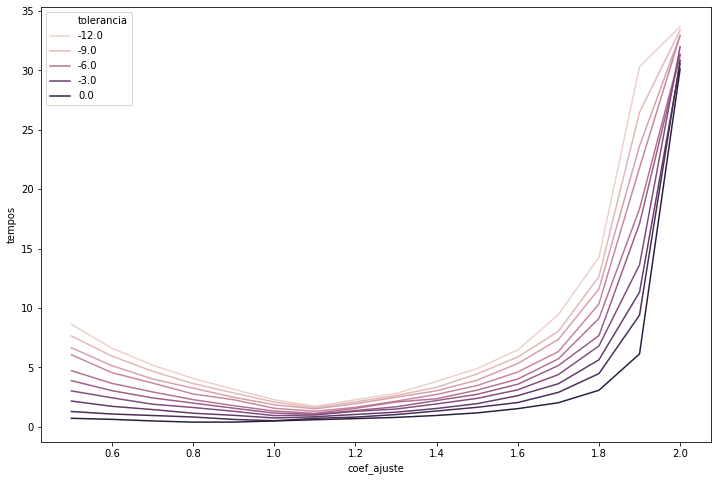

In [135]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="tempos", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

Gráfico de numero de interações x coeficiente de ajuste

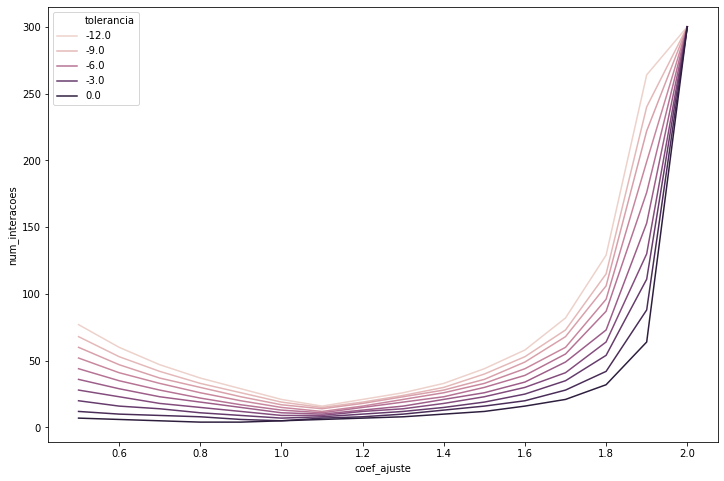

In [136]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="num_interacoes", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

## Geração de um data frame auxiliar para os coeficientes de ajuste (w) ótimos

Como desejamos apenas comparar o método SOR com o método do Gradiente Conjugado, para o coeficiente de ajuste (w) ótimo do SOR, geramos um data frame auxiliar com os dados do coeficiente ótimo para cada nivel de tolerância

In [141]:
i = -1
list_comp_interacoes = []
list_comp_erros = []
list_comp_coef = []
list_comp_tempos = []
list_tol = []
while i >= -10:
    num_interacoes_min = df_analise_SOR_COO[df_analise_SOR_COO.tolerancia == i].num_interacoes.min()
    list_comp_interacoes.append(num_interacoes_min)
    df_aux = df_analise_SOR_COO[(df_analise_SOR_COO.tolerancia == i) & (df_analise_SOR_COO.num_interacoes == num_interacoes_min)]
    erro_min = df_aux.erros.min()
    list_comp_erros.append(erro_min)
    df_aux = df_aux[df_aux.erros == erro_min]
    max_coef = df_aux.coef_ajuste.max()
    df_aux = df_aux[df_aux.coef_ajuste == max_coef]
    tempo_min = df_aux.tempos.min()
    list_comp_coef.append(max_coef)
    list_comp_tempos.append(tempo_min)
    list_tol.append(i)
    i -= 1

In [142]:
df_comparacao_SOR = pd.DataFrame({"num_interacoes": list_comp_interacoes, 
                                  "tempos":list_comp_tempos,
                                  "erros": list_comp_erros, 
                                  "coeficiente_min": list_comp_coef, 
                                  "tolerancia": list_tol})

In [143]:
df_analise_gradienteConjugado_COO.iloc[:,1:]

,num_interacoes,tempos,erros,tolerancia
0,343,36.167318,8.861893e-05,-1
1,377,39.253077,1.029809e-06,-2
2,399,42.118171,8.671782e-08,-3
3,420,43.842074,4.552042e-09,-4
4,437,46.039737,3.411034e-10,-5
5,453,47.797522,1.263255e-11,-6
6,464,48.770559,1.304409e-12,-7
7,476,50.320380,1.829840e-13,-8
8,490,51.817790,1.474546e-14,-9
9,502,54.270889,1.239023e-15,-10


In [144]:
df_comparacao_SOR

,num_interacoes,tempos,erros,coeficiente_min,tolerancia
0,4.0,0.398627,1.764047e-03,0.9,-1
1,5.0,0.512050,5.070766e-06,1.0,-2
2,7.0,0.744521,5.443794e-08,1.0,-3
3,9.0,0.998746,1.746393e-11,1.1,-4
4,10.0,1.055825,1.515257e-13,1.1,-5
5,11.0,1.132477,2.347338e-15,1.1,-6
6,12.0,1.306251,1.826483e-16,1.1,-7
7,14.0,1.514774,1.585296e-19,1.1,-8
8,15.0,1.625636,8.952489e-22,1.1,-9
9,16.0,1.732528,2.016797e-23,1.1,-10


# Outros

Salvar os data frames gerados para cada metodo em uma pasta "analise_" + o mesmo nome da matriz analisada

In [84]:
df_analise_SOR.to_csv("./analise_" + matriz_name + "/SOR.csv")
df_analise_SOR_COO.to_csv("./analise_" + matriz_name + "/SOR_COO.csv")
df_analise_gradienteConjugado.to_csv("./analise_" + matriz_name + "/gradienteConjugado.csv")
df_analise_gradienteConjugado_COO.to_csv("./analise_" + matriz_name + "/gradienteConjugado_COO.csv")
df_comparacao_SOR.to_csv("./analise_" + matriz_name + "/comparacao_SOR.csv")